# Pandas Review Homework Solutions

Import pandas

In [25]:
import pandas as pd

## 1. Make a data frame from a Python dictionary.

Create a Python dictionary containing

- the names of four of your friends (real or imaginary)
- their ages
- the year they started college
- their majors

Make a pandas data frame from your dictionary.

Show your new data frame.

Fetch the ages of all your friends.

Fetch the name of your fourth friend.

Fetch the age of your third friend.

Compute and show the average age of your friends.

## 2. Find a table of data on Wikipedia and import it.

Go to Widepedia and find a table of data. It can be anything you want.

In the cell below, import the data and display it (first and last five rows).

## 3. Load the RMS titanic data and export a subset of columns

Load the titanic data, make a `DataFrame` new `DataFrame` of the fare paid and the survival columns, and export it as a `.csv` file.

In [26]:
titanic = pd.read_csv("data/titanic.csv")
    

Import your new `.csv` file into a new `DataFrame` and show it (first and last five rows).

## 4. Fetch specific rows of data of the titanic data

Fetch all the second class passengers of the titanic data and put them in a new `DataFrame` and show it.

Fetch all the first and third class passengers, put them in a new `DataFrame`, and show it.

## 5. Plot some Titanic data

First, import `matplotlib`

### 5.a - Scatter plot

Make a scatter plot of fare vs. cabin class (seems like these should be perfectly related).

### 5.b - Distribution plot

Plot the distributions of fare paid for survivors and deceased in a way that makes for a good visual comparison.

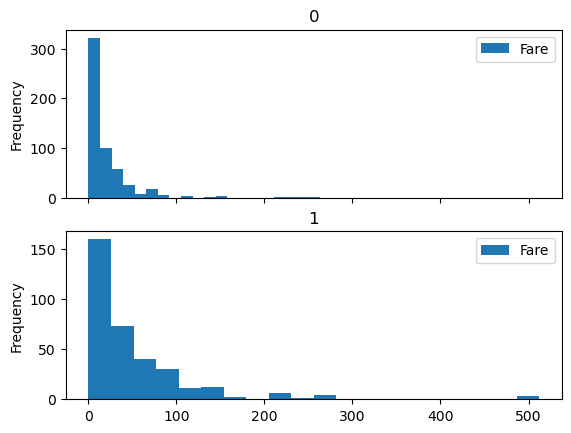

In [39]:
fare_surv = titanic[['Fare', 'Survived']]
fare_surv.plot.hist(column='Fare', by='Survived', sharex=True, bins=20);

## 6. Calculate new columns

### 6.a - Create a new column in your titanic `DataFrame` quantifying the total number of relative on board (siblings + parents).

### 6.b - Add another column – a Boolean column – indicating whether each person had any relatives on board.

## 7. Computing descriptive statistics

### 7.a - Compute a mean for a column

Compute the proportion of survivors of the RMS Titanic. **Hint**: the coding of `Survival` as 0 or 1 really works to our advantage here: the proportion of survivors in any group is easily computed using a common statistical function. The 7.a section header should also give you a big clue!

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
titanic['Survived'].mean()

0.3838383838383838

### 7.a - Compute a mean for a subset of data

Compute the proportion of survivors for the females on the RMS Titanic

In [15]:
tit_fems = titanic[titanic['Sex'] == 'female']
tit_fems['Survived'].mean()

0.7420382165605095

or

In [23]:
titanic[titanic['Sex'] == 'female']['Survived'].mean()

0.7420382165605095

### 7.b - Compute statistics by group

Compute the proportion of female vs. male survivors of the RMS Titanic.

In [24]:
titanic[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Compute the proportion of female vs. male survivors of the RMS Titanic, along with the **s**tandard **e**rror of the **m**ean. The **bold** type should give you a hint about the name of the method to compute the standard error.

To do this, you'll need to combine the `groupby()` and `agg()` methods!

In [19]:
my_stats_dict = {
         "Survived": ["mean", "sem"],
     }

titanic[['Survived', 'Sex']].groupby('Sex').agg(my_stats_dict)

Survived         
            mean      sem
Sex                      
female  0.742038  0.02473
male    0.188908  0.01631

What does this tell you about gender roles when the RMS Titanic was sunk?

In [27]:
my_stats_dict = {
         "Survived": ["mean", "sem"],
     }

a = titanic[['Survived', 'Pclass']].groupby('Pclass').agg(my_stats_dict)

What does this tell you about socio-economic status when the RMS Titanic was sunk?

In [28]:
a

Survived          
            mean       sem
Pclass                    
1       0.629630  0.032934
2       0.472826  0.036906
3       0.242363  0.019358

In [31]:
a.info

<bound method DataFrame.info of         Survived          
            mean       sem
Pclass                    
1       0.629630  0.032934
2       0.472826  0.036906
3       0.242363  0.019358>